In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

100%|██████████| 26421880/26421880 [00:03<00:00, 6979493.13it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 118137.40it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2158358.00it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6529264.29it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/20], Loss: 0.5145, Test Loss: 0.3581
Epoch [2/20], Loss: 0.2767, Test Loss: 0.3114
Epoch [3/20], Loss: 0.2148, Test Loss: 0.2812
Epoch [4/20], Loss: 0.1857, Test Loss: 0.2659
Epoch [5/20], Loss: 0.1243, Test Loss: 0.2594
Epoch [6/20], Loss: 0.2993, Test Loss: 0.2760
Epoch [7/20], Loss: 0.0913, Test Loss: 0.2545
Epoch [8/20], Loss: 0.3409, Test Loss: 0.2491
Epoch [9/20], Loss: 0.0535, Test Loss: 0.2581
Epoch [10/20], Loss: 0.0381, Test Loss: 0.2585
Epoch [11/20], Loss: 0.1113, Test Loss: 0.2684
Epoch [12/20], Loss: 0.1303, Test Loss: 0.2820
Epoch [13/20], Loss: 0.0231, Test Loss: 0.3014
Epoch [14/20], Loss: 0.0826, Test Loss: 0.3159
Epoch [15/20], Loss: 0.1632, Test Loss: 0.3116
Epoch [16/20], Loss: 0.0502, Test Loss: 0.3370
Epoch [17/20], Loss: 0.0578, Test Loss: 0.3468
Epoch [18/20], Loss: 0.0687, Test Loss: 0.3716
Epoch [19/20], Loss: 0.1995, Test Loss: 0.4062
Epoch [20/20], Loss: 0.0536

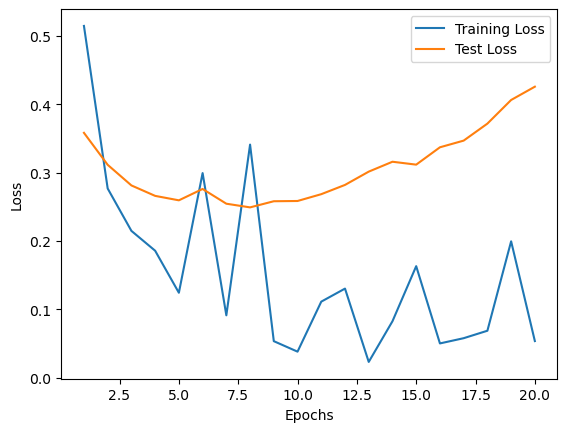

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# гиперпараметры
batch_size = 64
num_epochs = 20
learning_rate = 0.001

# данные обучения и тестирования
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# архитектура модели
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7 * 7 * 32, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

#  модель и оптимизатор
model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


train_losses = []
test_losses = []
epochs = []

# обучение модели
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # передача данных на GPU, если доступно
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        images = images.to(device)
        labels = labels.to(device)

        # прямой проход
        outputs = model(images)
        loss = criterion(outputs, labels)

        # обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # сохраняем значения ошибок для графика
    train_losses.append(loss.item())

    # вычисляем ошибку на тестовом наборе
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    # сохраняем значения ошибок на тестовом наборе для графика
    test_losses.append(test_loss / len(test_loader))

    epochs.append(epoch + 1)

    # выводим информацию об обучении
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')

# построение графика ошибки по эпохам
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
